In [50]:
from data.cifar10 import load_cifar10
from experiments.train_ncns import show_img

# In cifar-10-batches-py directory there are 5 files: data_batch_1 to data_batch_5
# These are PRE-SPLIT files created by CIFAR-10 dataset authors (10,000 images each)
train_loader, test_loader = load_cifar10(batch_size=32, data_dir='./../data')

/Users/nika.matcharadze/Documents/uni/generative models/Comparative-analysis-of-Generative-models-on-CIFAR-10/.venv/lib/python3.13/site-packages/torchvision/datasets/cifar.py:83: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  entry = pickle.load(f, encoding="latin1")


In [51]:
print(train_loader.dataset)
print(f"Number of training samples: {len(train_loader.dataset)}")
print(f"Number of batches: {len(train_loader)}")
print(f"Batch size: {train_loader.batch_size}")
print(f"image shape: {train_loader.dataset[0][0].shape}")


Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./../data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )
Number of training samples: 50000
Number of batches: 1563
Batch size: 32
image shape: torch.Size([3, 32, 32])


In [52]:
# Get a single batch to inspect
import matplotlib.pyplot as plt

# Get one batch
images, labels = next(iter(train_loader))
print(f"Batch shape: {images.shape}")  # Should be [32, 3, 32, 32]
print(f"Labels shape: {labels.shape}")  # Should be [32]
print(f"Image range: [{images.min():.3f}, {images.max():.3f}]")

# CIFAR-10 class names
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']


Batch shape: torch.Size([32, 3, 32, 32])
Labels shape: torch.Size([32])
Image range: [0.000, 1.000]


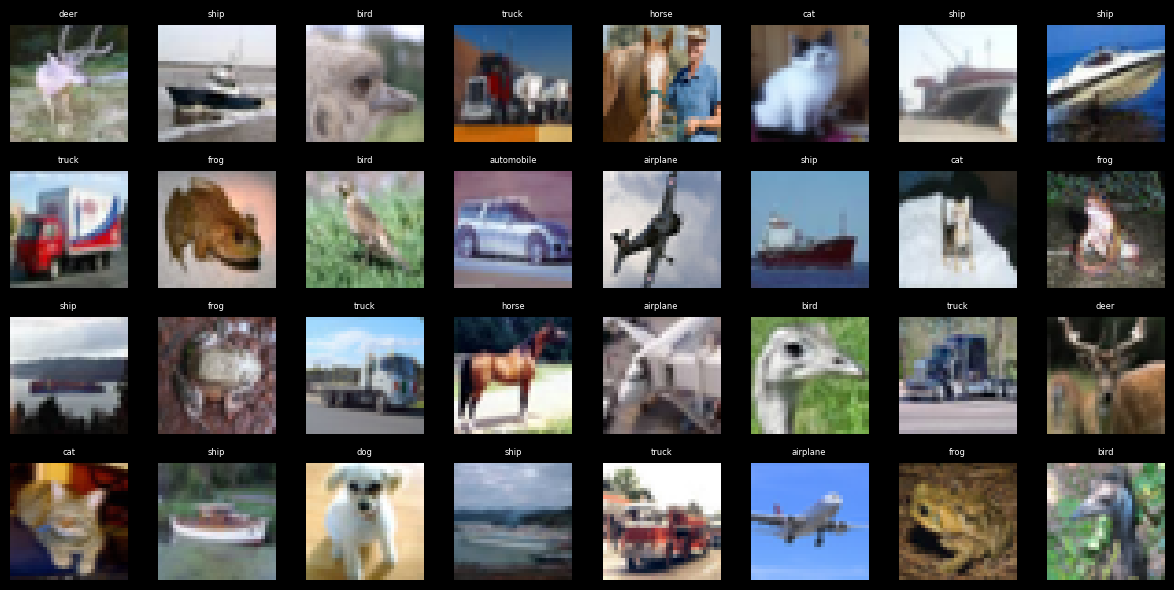

In [53]:
# Visualize a grid of images from the batch
fig, axes = plt.subplots(4, 8, figsize=(12, 6))
for idx, ax in enumerate(axes.flat):
    if idx < len(images):
        # Convert from CHW to HWC format for plotting
        img = images[idx].permute(1, 2, 0).numpy()
        ax.imshow(img)
        ax.set_title(classes[labels[idx]], fontsize=6)
        ax.axis('off')
plt.tight_layout()
plt.show()


In [54]:
# Example: Iterate through train_loader for training
# This is how you'd use it in your VAE/NCSN training loop

for batch_idx, (images, labels) in enumerate(train_loader):
    # images: torch.Tensor of shape [batch_size, 3, 32, 32]
    # labels: torch.Tensor of shape [batch_size]

    # For generative models, you typically only need the images
    # labels can be ignored for unconditional generation

    print(f"Batch {batch_idx}: images shape = {images.shape}")

    # Your training code would go here:
    # - Forward pass through model
    # - Compute loss
    # - Backward pass
    # - Optimizer step

    if batch_idx >= 2:  # Just show first 3 batches as example
        break


Batch 0: images shape = torch.Size([32, 3, 32, 32])
Batch 1: images shape = torch.Size([32, 3, 32, 32])
Batch 2: images shape = torch.Size([32, 3, 32, 32])


In [55]:
from models.scorebased_models.ncsn import NCSN
from utils.get_device import get_device
from train.train import Train
from utils.checkpointer import Checkpointer

device = get_device()

model = NCSN().to(device)

✓ MPS (Apple Silicon) is available
✓ MPS (Apple Silicon) is available
Config file configs/ncsn.yaml not found. Using default parameters.


In [61]:
checkpoint_dir = "/Users/nika.matcharadze/Documents/uni/generative models/Comparative-analysis-of-Generative-models-on-CIFAR-10/data"
checkpointer = Checkpointer(checkpoint_dir, "ncsn", 1, False)
train = Train(model, 200, train_loader, checkpointer, device)
train.load_checkpoint()

Loaded latest checkpoint: /Users/nika.matcharadze/Documents/uni/generative models/Comparative-analysis-of-Generative-models-on-CIFAR-10/data/ncsn_epoch_50.pt


In [70]:
import matplotlib.pyplot as plt
from torchvision import transforms

# Convert to HWC for plotting
def show_img(img):
  if img.dim() == 4:
      img = img[0]
  img = img.detach().cpu()
  img = img.clamp(0,1)
  img = img.permute(1,2,0)  # CHW -> HWC
  plt.figure(figsize=(4,4))
  plt.imshow(img, interpolation='nearest')
  plt.axis('off')
  plt.show()

In [64]:
model.sample(batch_size=1)

tensor([[[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

         [[1.0000, 0.2478, 0.0000,  ..., 0.4692, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 1.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [1.0000, 0.6296, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 1.0000,  ..., 0.0000, 0.0000, 1.0000],
          [1.0000, 0.0000, 1.0000,  ..., 1.0000, 1.0000, 0.0000]],

         [[0.0000, 0.3158, 0.0000,  ..., 0.0000, 0.0000, 0.8469],
          [0.0000, 1.0000, 0.0000,  ..., 0.0000, 0.0000, 1.0000],
          [0.0000, 0.7346, 0.0000,  ..., 0

In [73]:
train_loader.dataset.__getitem__(0)

(tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
          [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
          [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
          ...,
          [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
          [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
          [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],
 
         [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
          [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
          [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
          ...,
          [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
          [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
          [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],
 
         [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
          [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
          [0.0824, 0.0000, 0.0314,  ...,

In [79]:
import torch

device = get_device()

model = NCSN().to(device)
x = torch.randn(8, 3, 32, 32).to(device)
sigma = torch.ones(8).to(device)

y = model(x, sigma).to(device)
assert y.shape == x.shape

✓ MPS (Apple Silicon) is available
✓ MPS (Apple Silicon) is available
Config file configs/ncsn.yaml not found. Using default parameters.
